In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel(r"/content/Hep3B GD AlDH+ and ALDH- 01 13 23 (2).xlsx")
df

,Control ALDH+,GD ALDH+,Gene Expression,Gene Symbol,Description,Regulation,Type
0,33.458248,30.439390,-3.018858,HMCN1,Hemicentin 1,Upregulated,Similar Alteration in ALDH+ and ALDH-
1,28.423433,25.557131,-2.866302,LATS1,"LATS, large tumor suppressor, homolog 1 (Droso...",Upregulated,Similar Alteration in ALDH+ and ALDH-
2,33.578514,31.703978,-1.874537,DVL2,"Dishevelled, dsh homolog 2 (Drosophila)",Upregulated,Unique to ALDH+
3,26.675341,24.979813,-1.695528,CCNE2,Cyclin E2,Upregulated,Unique to ALDH+
4,25.661194,24.906298,-0.754896,TAOK1,TAO kinase 1,NaN,Unique to ALDH-
...,...,...,...,...,...,...,...
75,23.698246,28.584711,4.886465,PPP2R1A,"Protein phosphatase 2, regulatory subunit A, a...",Downregulated,NaN
76,23.318907,28.477030,5.158123,GAPDH,Glyceraldehyde-3-phosphate dehydrogenase,Downregulated,NaN
77,23.690296,29.353416,5.663120,TJP2,Tight junction protein 2 (zona occludens 2),Downregulated,NaN
78,25.260233,31.198513,5.938280,TEAD1,TEA domain family member 1 (SV40 transcription...,Downregulated,Similar Alteration in ALDH+ and ALDH-


In [ ]:
df.columns

Index(['Control ALDH+', 'GD ALDH+', 'Gene Expression', 'Gene Symbol',
       'Description', 'Regulation', 'Type'],
      dtype='object')

# The graph is to be drawn for rows 52, 68, 69, 71, 73, 74 which are all 'Unique to ALDH+'

# Creating the Scatter plot (UMAP)

<Axes: xlabel='Gene Expression', ylabel='Regulation'>

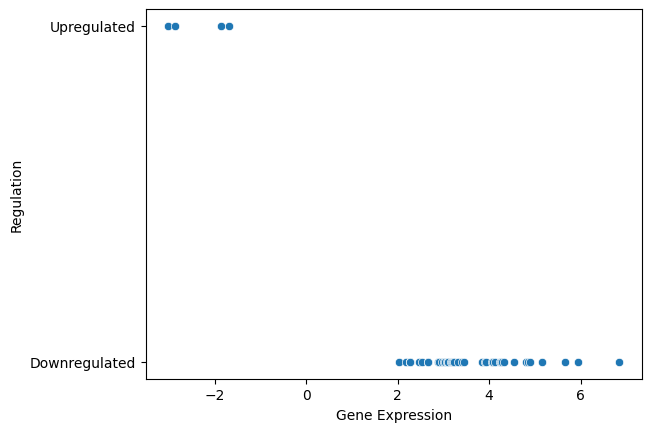

In [ ]:
# creating a graph containing "Unique to ALDH+"

sns.scatterplot(data= df, x="Gene Expression", y= "Regulation")

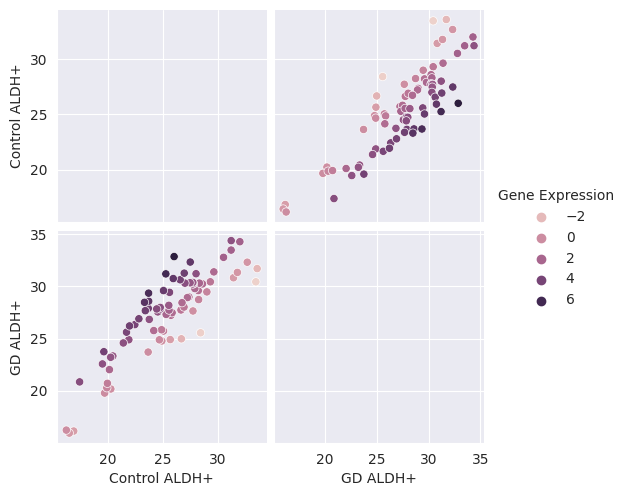

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(df, hue='Gene Expression')

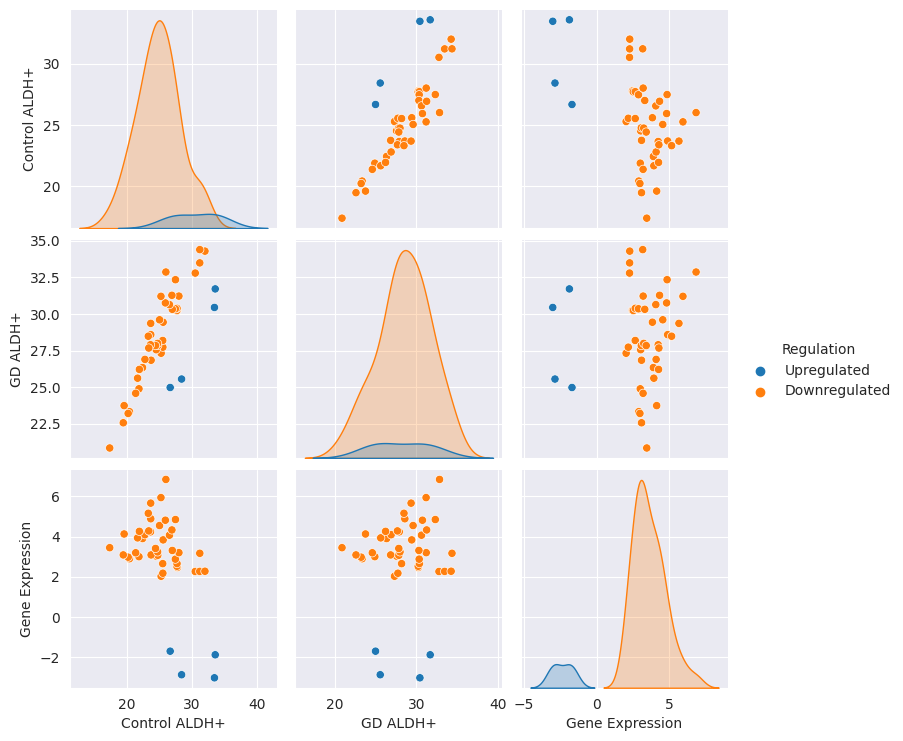

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(df, hue='Regulation')

In [ ]:
!pip install umap-learn
import umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82808 sha256=d99dff51710f8a12d363e8dd44de1df1751c0f042dc173f4192e357794b01a59
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55617 sha256=77c1cc3769a596458ba168e1d8ebb6b7adddee630d1fdbc7ff5c34f642ca8958
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
reducer = umap.UMAP()

# umap for normalized

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_2 = df[
    [
        "Gene Expression"
    ]
].values
scaled_df_2 = StandardScaler().fit_transform(df_2)

In [ ]:
embedder = reducer.fit_transform(scaled_df_2)


In [ ]:
embedder

array([[12.070966 , 11.551246 ],
       [12.03501  , 11.613567 ],
       [11.835145 , 11.367025 ],
       [11.777056 , 11.493794 ],
       [11.443691 , 11.1982565],
       [11.795182 , 10.8489   ],
       [11.852716 , 10.9065485],
       [11.506177 , 10.874893 ],
       [11.520848 , 10.933787 ],
       [12.046018 , 10.9594965],
       [12.617984 , 11.141628 ],
       [12.535141 , 10.998529 ],
       [12.73102  , 11.20355  ],
       [12.908707 , 11.353539 ],
       [13.007819 , 11.093159 ],
       [13.146108 , 11.083849 ],
       [13.424934 , 11.034545 ],
       [13.803569 , 10.903094 ],
       [13.996148 , 11.009404 ],
       [14.133382 , 10.935406 ],
       [14.618419 , 10.793101 ],
       [14.868318 , 10.707612 ],
       [15.114064 , 10.807899 ],
       [15.503936 , 10.468304 ],
       [15.340603 , 10.600336 ],
       [15.393154 , 10.598748 ],
       [17.84636  ,  9.382928 ],
       [18.193256 ,  9.204844 ],
       [18.411495 ,  9.52551  ],
       [18.621176 ,  9.509025 ],
       [18

In [ ]:
embedder.shape

(80, 2)

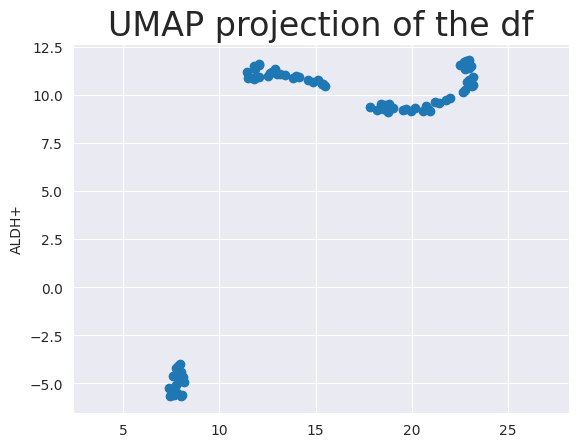

In [ ]:
plt.scatter(
    embedder[:, 0],
    embedder[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.ylabel("ALDH+")
plt.title('UMAP projection of the df', fontsize=24);

# Graphing on the basis of Type.

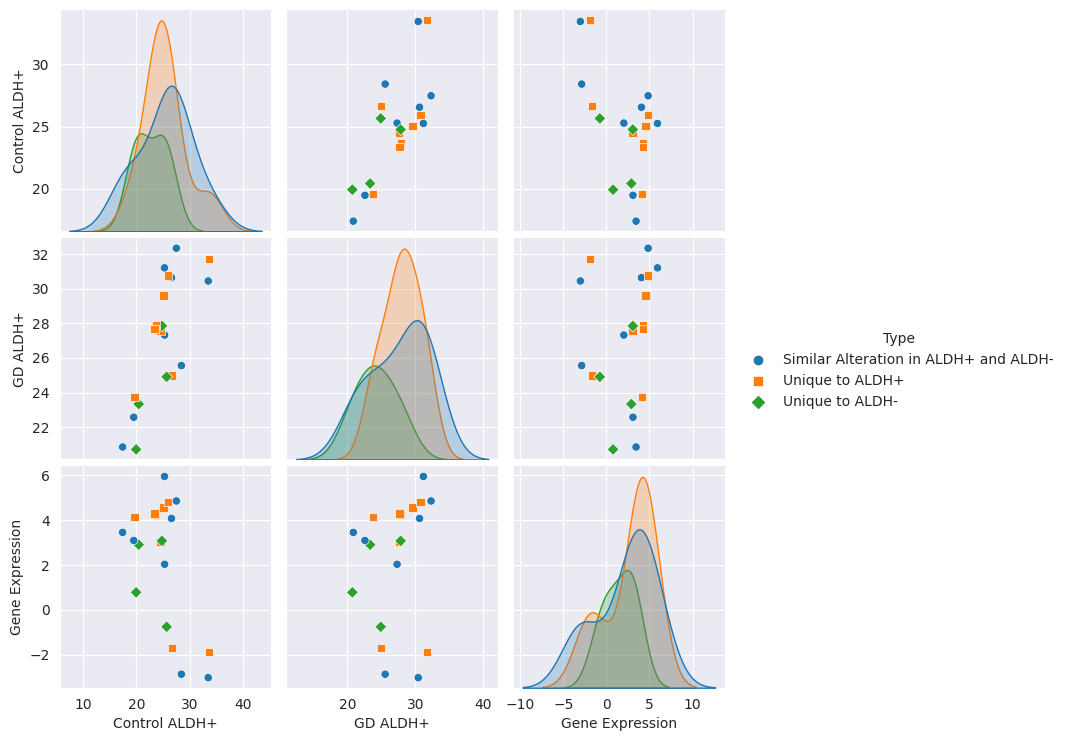

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(df, hue='Type', markers=["o", "s", "D"])

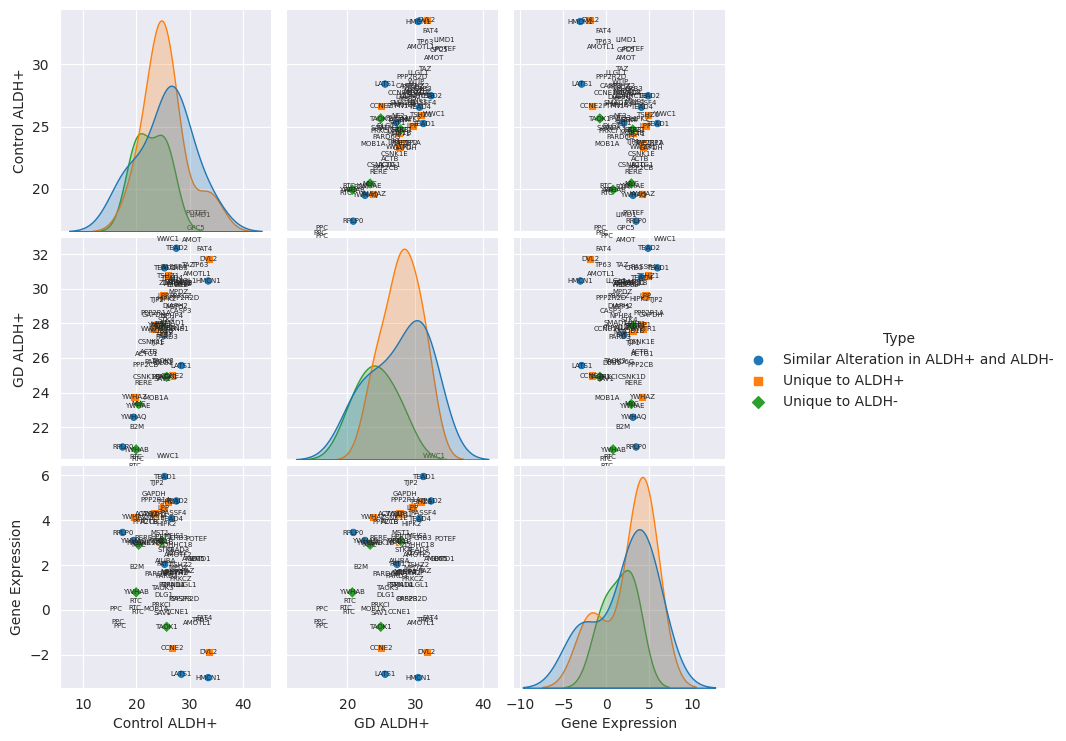

In [ ]:
g = sns.pairplot(df, hue='Type', markers=["o", "s", "D"], diag_kind="kde")

# Add labels to each point
for i, row in enumerate(g.axes):
    for j, ax in enumerate(row):
        if i == j:
            continue
        for idx, label in enumerate(df['Gene Symbol']):
            ax.text(df.iloc[idx, j], df.iloc[idx, i], label, ha='center', va='center', fontsize = 5)

# Show the plot
plt.show()

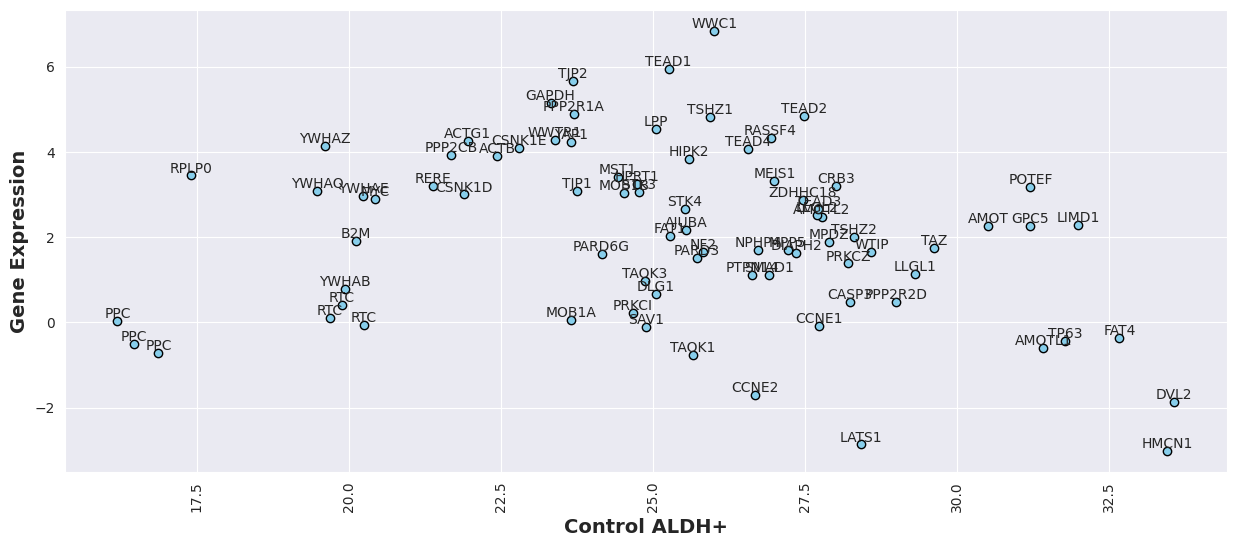

In [ ]:
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed

g = plt.scatter(df['Control ALDH+'], df['Gene Expression'], color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Control ALDH+', fontsize = 14, fontweight = 'bold')
plt.ylabel('Gene Expression', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 90)

for i in range(len(df)):
    plt.text(df.loc[i, 'Control ALDH+'], df.loc[i, 'Gene Expression'], df.loc[i, 'Gene Symbol'], ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

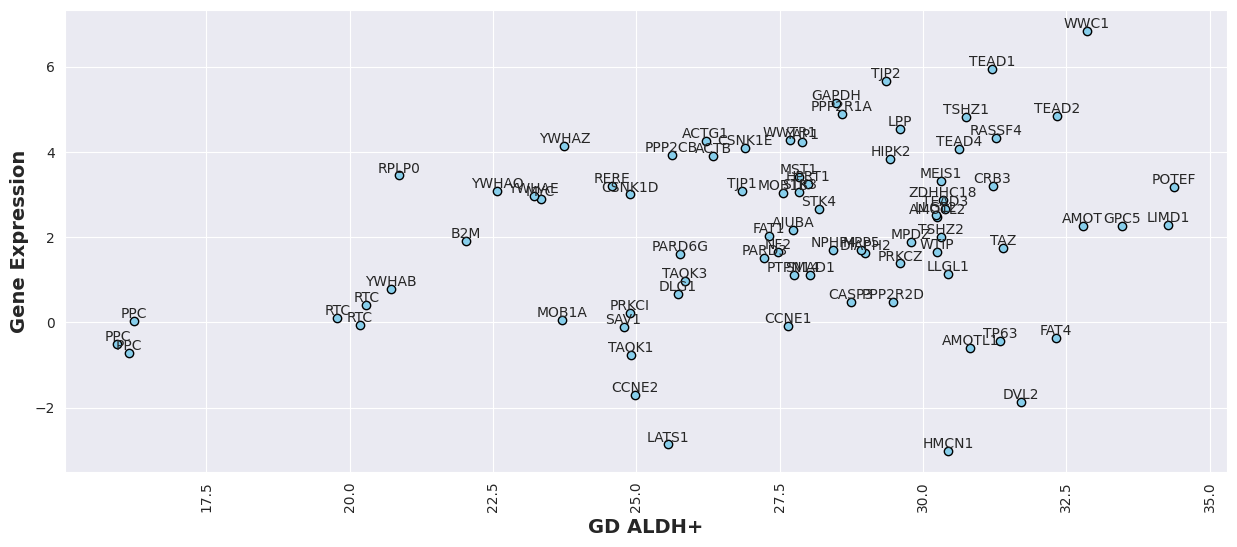

In [ ]:
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed

g = plt.scatter(df['GD ALDH+'], df['Gene Expression'], color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('GD ALDH+', fontsize = 14, fontweight = 'bold')
plt.ylabel('Gene Expression', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 90)

for i in range(len(df)):
    plt.text(df.loc[i, 'GD ALDH+'], df.loc[i, 'Gene Expression'], df.loc[i, 'Gene Symbol'], ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

In [ ]:
category_counts = df['Type'].value_counts()
print(category_counts)

Similar Alteration in ALDH+ and ALDH-    8
Unique to ALDH+                          8
Unique to ALDH-                          4
Name: Type, dtype: int64


In [ ]:
total_category_counts = df['Type'].value_counts().sum()
total_category_counts

20

In [ ]:
each = category_counts/total_category_counts
print(each*100)

Similar Alteration in ALDH+ and ALDH-    40.0
Unique to ALDH+                          40.0
Unique to ALDH-                          20.0
Name: Type, dtype: float64


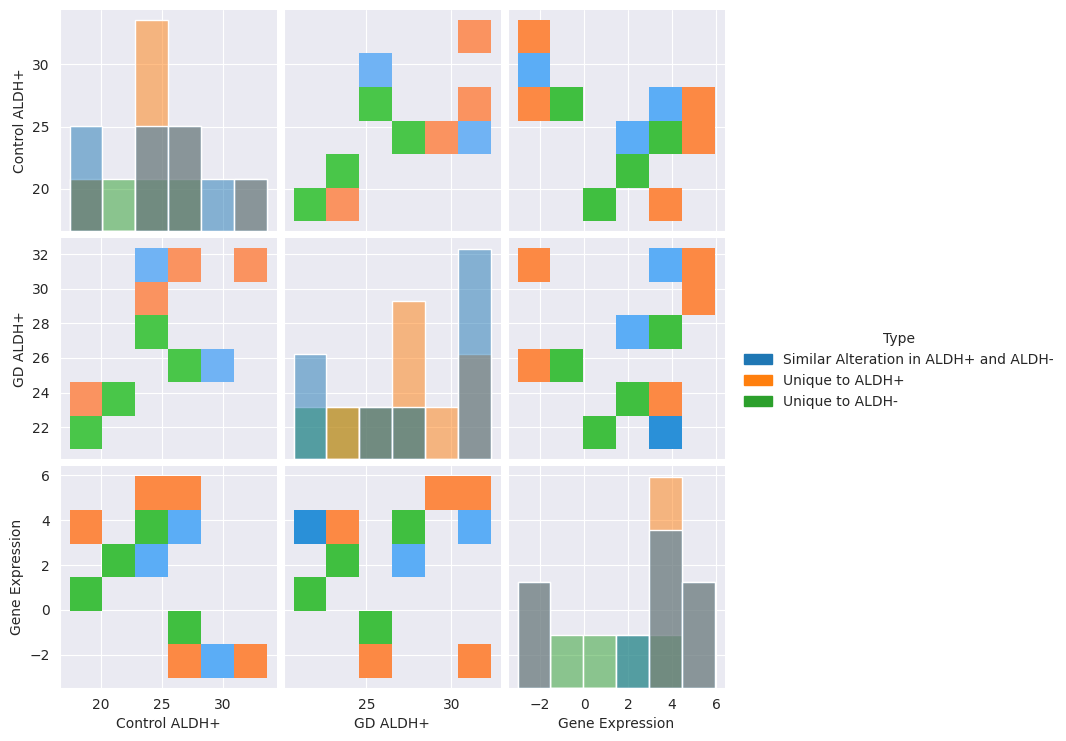

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(df, hue = 'Type', kind="hist")

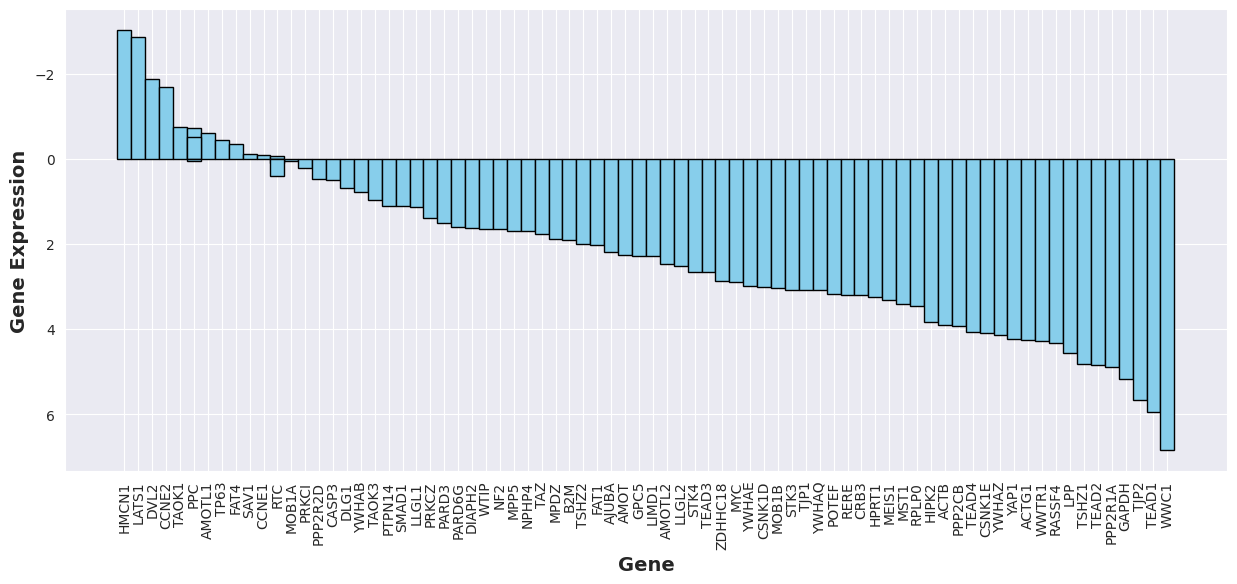

In [ ]:
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed

plt.bar(df['Gene Symbol'], df['Gene Expression'], color='skyblue', edgecolor='black', width=1)

# Set labels and title
plt.xlabel('Gene', fontsize = 14, fontweight = 'bold')
plt.ylabel('Gene Expression', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 90)

plt.gca().invert_yaxis()

# Show the plot
plt.show()